<a href="https://colab.research.google.com/github/arqPy/CAD/blob/main/testes_pds_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Funções de Singularidade
def impUnit(n, n0 = 0):
  imp = np.zeros(n.shape)
  imp[n==n0] = 1
  return imp

def tremImp(n, T, n0 = 0):
  trem = np.zeros(n.shape)
  #trem[::T] = 1
  listTime = list(n)
  p = listTime.index(n0)
  print(p, n0)
  if (p != -1):
    trem[p::T] = 1
    trem[p::-T] = 1

  return trem

def degU(n, n0=0):
  u = np.zeros(n.shape)
  u[n >= n0] = 1
  return u

def sinal(n, n0=0):
  s = np.zeros(n.shape)
  s[n > n0] = 1
  s[n < n0] = -1
  return s

def rampa(n, n0=0):
  ramp = np.zeros(n.shape)
  aux = n0*np.ones(n.shape)

  ramp[n > n0] = n[n>n0] - aux[n > n0]
  return ramp


#teste
n = np.arange(-3, 4)
print(impUnit(n,2))
print(degU(n,2))
print(sinal(n,2))
print(rampa(n,-2))
print(tremImp(n,2, -1))
print(n)

[0. 0. 0. 0. 0. 1. 0.]
[0. 0. 0. 0. 0. 1. 1.]
[-1. -1. -1. -1. -1.  0.  1.]
[0. 0. 1. 2. 3. 4. 5.]
2 -1
[1. 0. 1. 0. 1. 0. 1.]
[-3 -2 -1  0  1  2  3]


5 0
4 -1


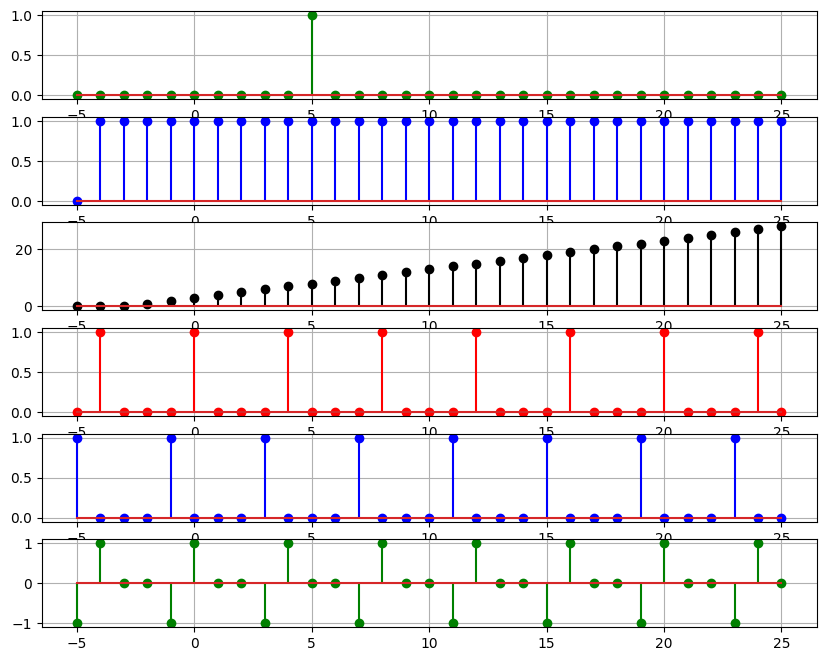

In [ ]:
# plotando
nTime = np.arange(-5, 26, 1) # base de tempo
x = impUnit(nTime,5)
h = degU(nTime,-4)
y = rampa(nTime, -3)
w = tremImp(nTime, 4)
z = tremImp(nTime, 4,-1)
ex1 = w - z

fig = plt.figure(figsize=(10, 8))

a = fig.add_subplot(6, 1, 1)
a.stem(nTime, x, 'g')
a.grid()

a = fig.add_subplot(6, 1, 2)
a.stem(nTime, h, 'blue')
a.grid()

a = fig.add_subplot(6, 1, 3)
a.stem(nTime, y, 'black')
a.grid()

a = fig.add_subplot(6, 1, 4)
a.stem(nTime, w, 'red')
a.grid()

a = fig.add_subplot(6, 1, 5)
a.stem(nTime, z, 'blue')
a.grid()

a = fig.add_subplot(6, 1, 6)
a.stem(nTime, ex1, 'g')
a.grid()

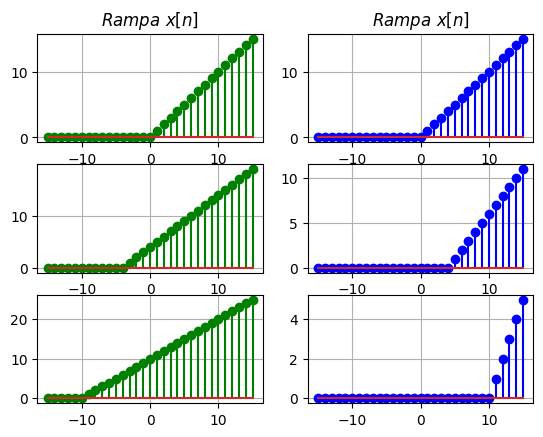

In [ ]:
# plotando deslocando esquerda e direita
nTime = np.arange(-15, 16) # base de tempo
x = rampa(nTime)


fig = plt.figure()

a = fig.add_subplot(3, 2, 1)
a.stem(nTime, x, 'g')
a.set_title("$Rampa \ x[n]$")
a.grid()

a = fig.add_subplot(3, 2, 2)
a.stem(nTime, x, 'b')
a.set_title("$Rampa \ x[n]$")
a.grid()

x = rampa(nTime,-4)
a = fig.add_subplot(3, 2, 3)
a.stem(nTime, x, 'g')
a.grid()

x = rampa(nTime,4)
a = fig.add_subplot(3, 2, 4)
a.stem(nTime, x, 'b')
a.grid()

x = rampa(nTime,-10)
a = fig.add_subplot(3, 2, 5)
a.stem(nTime, x, 'g')
a.grid()

x = rampa(nTime,10)
a = fig.add_subplot(3, 2, 6)
a.stem(nTime, x, 'b')
a.grid()


In [ ]:
fatiando = "000009878000"
n = len(fatiando)
fat_2 = fatiando[2:] + fatiando[:2]
print(fat_2, len(fat_2))

000987800000 12


In [ ]:
from ctypes import Array
x = rampa(n)
n0 = 1
listTime = list(n)
p = listTime.index(n0)
if (p != -1):
  listTime = list(x[p:]) + list(x[:p])
print(p, n, listTime, x)

4 [-3 -2 -1  0  1  2  3] [1.0, 2.0, 3.0, 0.0, 0.0, 0.0, 0.0] [0. 0. 0. 0. 1. 2. 3.]


In [ ]:
W4 = np.exp(-2j*np.pi/4)
x = np.array([1, 2, 3, 4])
Xk = np.zeros(x.shape,dtype = 'complex_')

for k in range(4):
  for n in range(4):
    Xk[k] += x[n]*W4**(n*k)


print(Xk)

[10.+0.00000000e+00j -2.+2.00000000e+00j -2.-9.79717439e-16j
 -2.-2.00000000e+00j]


In [ ]:
N=3
WN = np.exp(-2j*np.pi/N)
x = np.array([2, 0, 1])
Xk = np.zeros(x.shape,dtype = 'complex_')

for k in range(N):
  for n in range(N):
    Xk[k] += x[n]*WN**(n*k)


print(Xk)

[3. +0.j        1.5+0.8660254j 1.5-0.8660254j]


In [ ]:
np.fft.fft(x)

array([3. +0.j       , 1.5+0.8660254j, 1.5-0.8660254j])

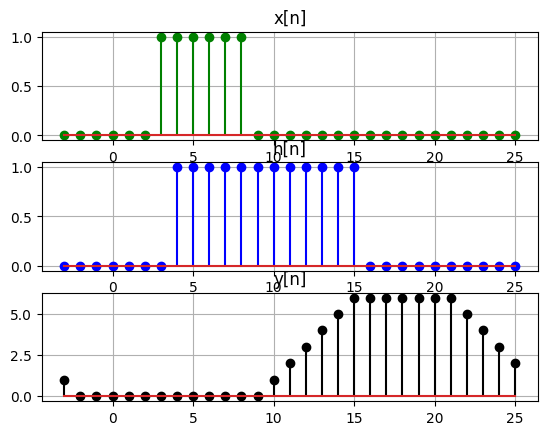

In [ ]:
def degrau(n, n0):
  u = np.zeros(n.shape)
  u[n >= n0] = 1
  return u

def respImp(h, n, n0):
  u = np.zeros(n.shape)
  u[n >= n0] = 1
  return u

nTime = np.arange(-3, 26, 1) # base de tempo
x = degrau(nTime, 3) - degrau(nTime, 9)
h = degrau(nTime, 4) - degrau(nTime, 16)
y = np.zeros(nTime.shape)


i = 0
for n in nTime:
  for k in np.arange(3, 9, 1):
    y[i] = y[i] + h[n - k]
  i += 1

fig = plt.figure(1)

a = fig.add_subplot(3, 1, 1)
a.stem(nTime, x, 'g')
a.set_title("x[n]")
a.grid()

a = fig.add_subplot(3, 1, 2)
a.stem(nTime, h, 'blue')
a.set_title("h[n]")
a.grid()

a = fig.add_subplot(3, 1, 3)
a.stem(nTime, y, 'black')
a.set_title("y[n]")
a.grid()

plt.show()

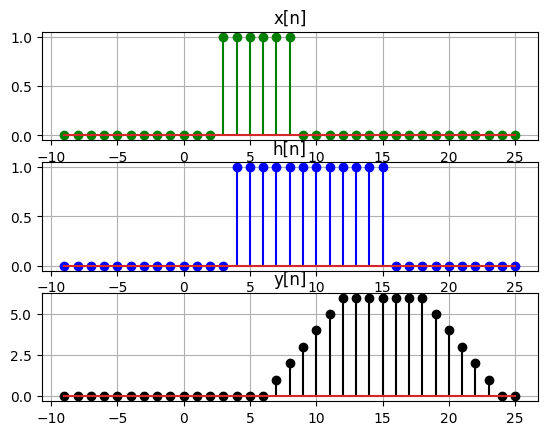

In [ ]:
##########################################
# x[n] = 1, se 3<=n<=8 e x[n]=0 , cc
# h[n] = 1, se 4<=n<=15 e h[n]=0 , cc
# calcular y[n] = x[n]*h[n]
##########################################
def x(n):
  if ((n<=8)and(n>=3)):
    return 1
  return 0

def h(n):
  if ((n<=15)and(n>=4)):
    return 1
  return 0

nTime = np.arange(-9, 26, 1) # base de tempo
y = np.zeros(nTime.shape)

x_ar = np.zeros(nTime.shape)
h_ar = np.zeros(nTime.shape)

i = 0
for n in nTime:
  h_ar[i] = h(n)
  x_ar[i] = x(n)
  for k in np.arange(3, 9, 1):
    y[i] = y[i] + h(n - k)
  i += 1

fig = plt.figure(1)

a = fig.add_subplot(3, 1, 1)
a.stem(nTime, x_ar, 'g')
a.set_title("x[n]")
a.grid()

a = fig.add_subplot(3, 1, 2)
a.stem(nTime, h_ar, 'blue')
a.set_title("h[n]")
a.grid()

a = fig.add_subplot(3, 1, 3)
a.stem(nTime, y, 'black')
a.set_title("y[n]")
a.grid()

plt.show()



In [ ]:
nTime[0]

-9

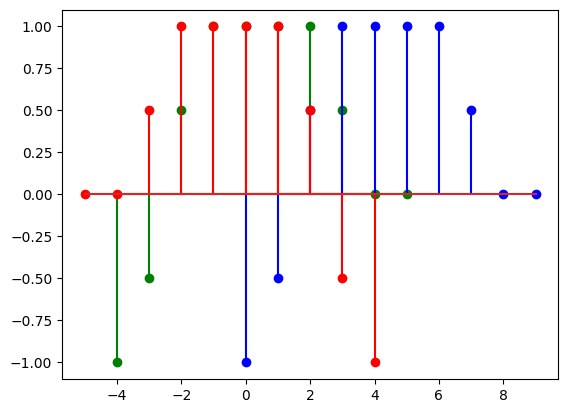

'\nt = np.arange(-2,9) + 2 # deslocamento de 2 unidades, manter a dimensçao de x\nplt.stem(t,x)\nplt.show()\n'

In [ ]:
n = np.arange(-4,6) # base de tempo
n1 = n + 4 # deslocamento
n2 = -n # inversão
x = [ -1, -.5, .5, 1, 1, 1, 1, .5, 0, 0]
plt.stem(n,x, 'green')
plt.stem(n1,x, 'blue')

plt.stem(n2, x, 'red')
plt.show()
'''
t = np.arange(-2,9) + 2 # deslocamento de 2 unidades, manter a dimensçao de x
plt.stem(t,x)
plt.show()
'''

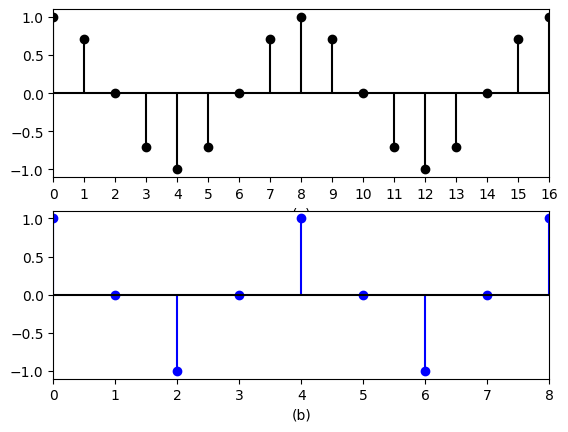

In [ ]:
# -*- coding: utf-8 -*-
################################################################################
# Compressão na reamostragem do cosseno
# Autor: José Alexandre Nalon
# Data: 15-Nov-2011
################################################################################

################################################################################
# Importa as bibliotecas necessárias
from numpy import *
from pylab import *

################################################################################
# Cria as funções a serem plotadas.
n = arange(0., 17., 1., dtype=float)
x1 = cos(pi * n / 4 )
x2 = x1[::2]
n2=n[:9]

################################################################################
# Plota
fig = figure(1)

a = fig.add_subplot(2, 1, 1)
a.stem(n, x1, linefmt="k-", markerfmt="ko", basefmt="k-")
a.set_xlim([ 0, 16 ])
a.set_ylim([ -1.1, 1.1 ])
a.set_xlabel("(a)")
a.set_xticks(n)

a = fig.add_subplot(2, 1, 2)
a.stem(n2, x2, linefmt="b-", markerfmt="bo", basefmt="k-")
a.set_xlim([ 0, 8 ])
a.set_ylim([ -1.1, 1.1 ])
a.set_xlabel("(b)")
a.set_xticks(arange(0., 9.))

################################################################################
# Salva a figura.
savefig("SignalCompression.png", bbox_inches='tight')

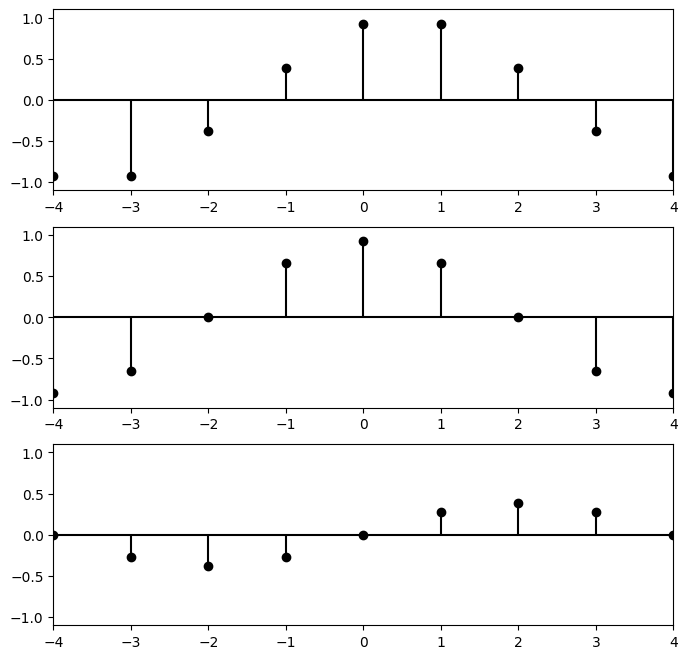

In [ ]:
# -*- coding: utf-8 -*-
################################################################################
# Obtenção das partes par e ímpar de um sinal
# Autor: José Alexandre Nalon
# Data: 30-Out-2011
################################################################################

################################################################################
# Importa as bibliotecas necessárias
from numpy import *
from pylab import *

################################################################################
# Define a função a ser utilizada
def x(n):
    return cos(pi/4.*n - pi/8.)

################################################################################
# Cria as funções a serem plotadas.
n = arange(-4., 5.)
xe = 0.5 * (x(n) + x(-n))
xo = 0.5 * (x(n) - x(-n))

################################################################################
# Plota
fig = figure(1)
fig.set_size_inches((8., 8.))

a = fig.add_subplot(3, 1, 1)

a.stem(n, x(n), linefmt="k-", markerfmt="ko", basefmt="k-")
a.set_xlim([ -4., 4. ])
a.set_ylim([ -1.1, 1.1 ])
a.set_xticks(n)

a = fig.add_subplot(3, 1, 2)
#a.hold(True)
a.stem(n, xe, linefmt="k-", markerfmt="ko", basefmt="k-")
a.set_xlim([ -4., 4. ])
a.set_ylim([ -1.1, 1.1 ])
a.set_xticks(n)

a = fig.add_subplot(3, 1, 3)
#a.hold(True)
a.stem(n, xo, linefmt="k-", markerfmt="ko", basefmt="k-")
a.set_xlim([ -4., 4. ])
a.set_ylim([ -1.1, 1.1 ])
a.set_xticks(n)

################################################################################
# Salva a figura.
savefig("EvenOddSimmetry.png", bbox_inches='tight')

#Referência Bibliográfica

![](https://ipds.wdfiles.com/local--files/start/ipds-small.jpg)

http://ipds.wikidot.com/

![](http://ipds.wikidot.com/local--files/cha:capitulo1/Convolution.png)

$y[n]=\sum_{k=-∞}^nx[n]$

# Laboratório de Eletrônica

Curva Característica do Diodo

![](https://upload.wikimedia.org/wikipedia/commons/thumb/3/32/Diodo_graph.svg/450px-Diodo_graph.svg.png)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Text(0, 0.5, 'Id(A)')

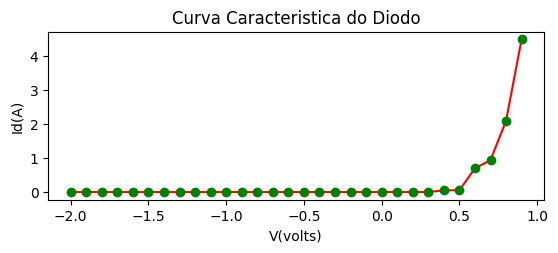

In [ ]:
################################################################################
# Pontos para plotagem.
v = np.arange(-2., 1., 0.1)

id = 20*[0] + [0, 0, 0, 0., 0.05, 0.055, 0.7, 0.94, 2.1, 4.5  ]

################################################################################
# Plota
fig = plt.figure(1)

a = fig.add_subplot(2, 1, 1)
a.plot(v, id, 'r-')
a.plot(v, id, 'go')
plt.title('Curva Caracteristica do Diodo')
a.set_xlabel("V(volts)")
a.set_ylabel("Id(A)")


In [ ]:
v

array([-2.00000000e+00, -1.90000000e+00, -1.80000000e+00, -1.70000000e+00,
       -1.60000000e+00, -1.50000000e+00, -1.40000000e+00, -1.30000000e+00,
       -1.20000000e+00, -1.10000000e+00, -1.00000000e+00, -9.00000000e-01,
       -8.00000000e-01, -7.00000000e-01, -6.00000000e-01, -5.00000000e-01,
       -4.00000000e-01, -3.00000000e-01, -2.00000000e-01, -1.00000000e-01,
        1.77635684e-15,  1.00000000e-01,  2.00000000e-01,  3.00000000e-01,
        4.00000000e-01,  5.00000000e-01,  6.00000000e-01,  7.00000000e-01,
        8.00000000e-01,  9.00000000e-01])

In [ ]:
10*[0]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

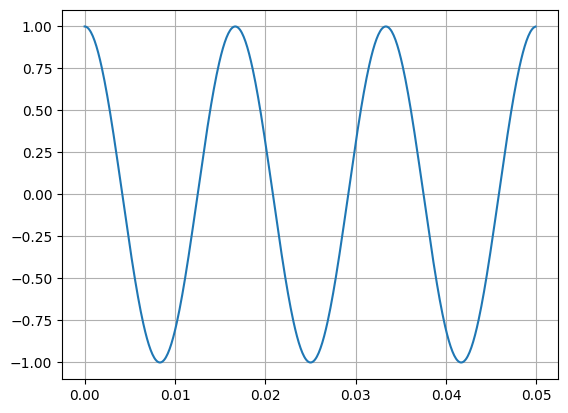

In [ ]:
t = np.arange(0, 50e-3, 1e-4)
y = np.cos(2*np.pi*60*t)
plt.plot(t, y)
plt.grid()

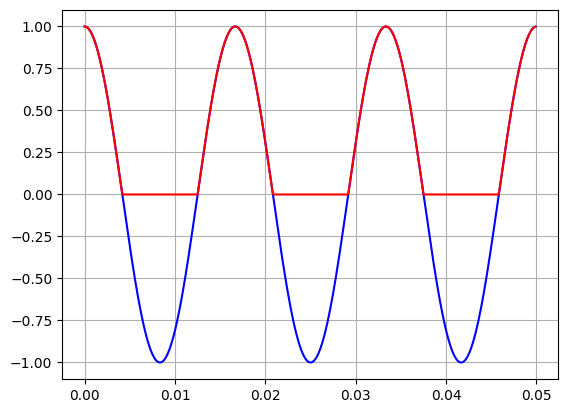

In [ ]:
x1 =  np.cos(2*np.pi*60*t)           # np.copy(y)
x1[y<=0] = 0
plt.plot(t, y, 'b')
plt.plot(t, x1, 'r')
plt.grid()

In [ ]:
8+35+135+174+8+80+1+367


808